In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set Retrieval

In [1]:
train_df = pd.read_excel(r'Data.xlsx')
xls = pd.ExcelFile(r'F:\Docs\Hackathon\Flipr 7.0\Data.xlsx')
test_df = pd.read_excel(xls, 'Test_Data')

NameError: name 'pd' is not defined

In [3]:
train_df.head()

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
1,AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
2,Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
3,Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [4]:
test_df.head()

,PLAYER,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s
0,David Warner,12,12,2,692,100*,69.2,481,143.86,1,8,57,21
1,KL Rahul,14,14,3,593,100*,53.9,438,135.38,1,6,49,25
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25
3,Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11
4,Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52


# Data Preparation

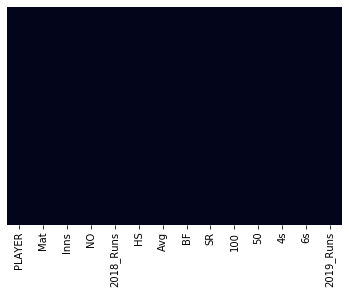

In [5]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

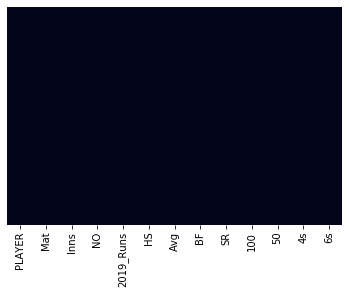

In [6]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
PLAYER       100 non-null object
Mat          100 non-null int64
Inns         100 non-null int64
NO           100 non-null int64
2018_Runs    100 non-null int64
HS           100 non-null object
Avg          100 non-null object
BF           100 non-null int64
SR           100 non-null float64
100          100 non-null int64
50           100 non-null int64
4s           100 non-null int64
6s           100 non-null int64
2019_Runs    100 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 11.1+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
PLAYER       100 non-null object
Mat          100 non-null int64
Inns         100 non-null int64
NO           100 non-null int64
2019_Runs    100 non-null int64
HS           100 non-null object
Avg          100 non-null object
BF           100 non-null int64
SR           100 non-null float64
100          100 non-null int64
50           100 non-null int64
4s           100 non-null int64
6s           100 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 10.3+ KB


In [9]:
def HS(high_score):
    if(type(high_score) == type(1)):
        return(high_score)
    else:
        return(int(high_score.replace('*', "")))

In [10]:
def AVG(avg):
    if(avg == '-'):
        return(0.0)
    else:
        return(float(avg))

In [11]:
print(HS(train_df['HS'][1]))

90


In [12]:
print(AVG(train_df['Avg'][0]))

16.75


In [13]:
train_df['HS'] = train_df['HS'].map(HS)
test_df['HS'] = test_df['HS'].map(HS)

In [14]:
train_df['Avg'] = train_df['Avg'].map(AVG)
test_df['Avg'] = test_df['Avg'].map(AVG)

In [15]:
train_df.corr()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
Mat,1.000000,0.817313,0.419649,0.621583,0.459063,0.261151,0.627702,0.229214,0.163470,0.464256,0.579464,0.552993,0.646824
Inns,0.817313,1.000000,0.331445,0.854712,0.715055,0.487095,0.866806,0.202235,0.236876,0.648895,0.804345,0.758132,0.888672
NO,0.419649,0.331445,1.000000,0.194659,0.101962,0.430193,0.182913,0.098253,-0.044807,0.143256,0.099879,0.182424,0.194198
2018_Runs,0.621583,0.854712,0.194659,1.000000,0.859565,0.699034,0.987540,0.288853,0.385389,0.892745,0.965879,0.899565,0.987421
HS,0.459063,0.715055,0.101962,0.859565,1.000000,0.691233,0.831596,0.389671,0.454677,0.784726,0.800926,0.854788,0.863736
Avg,0.261151,0.487095,0.430193,0.699034,0.691233,1.000000,0.666328,0.367481,0.237986,0.656640,0.623841,0.677282,0.679985
BF,0.627702,0.866806,0.182913,0.987540,0.831596,0.666328,1.000000,0.206185,0.341548,0.873875,0.960262,0.841958,0.981748
SR,0.229214,0.202235,0.098253,0.288853,0.389671,0.367481,0.206185,1.000000,0.131994,0.233898,0.250981,0.403443,0.296458
100,0.163470,0.236876,-0.044807,0.385389,0.454677,0.237986,0.341548,0.131994,1.000000,0.234382,0.340299,0.513705,0.358404
50,0.464256,0.648895,0.143256,0.892745,0.784726,0.656640,0.873875,0.233898,0.234382,1.000000,0.871870,0.781615,0.857904


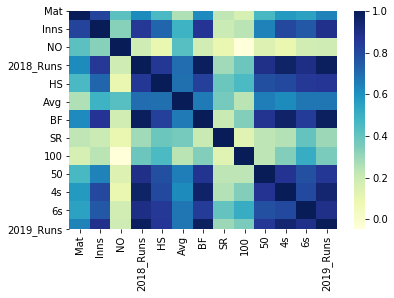

In [16]:
sns.heatmap(train_df.corr(),yticklabels=True,cbar=True,cmap='YlGnBu')

In [17]:
train_df.drop(['NO', 'SR', 100, 'PLAYER'], axis = 1, inplace = True)
test_df.drop(['NO', 'SR', 100, 'PLAYER'], axis = 1, inplace = True)

In [18]:
train_df.head()

,Mat,Inns,2018_Runs,HS,Avg,BF,50,4s,6s,2019_Runs
0,10,9,134,46,16.75,100,0,6,8,160
1,12,11,480,90,53.33,275,6,39,30,424
2,3,3,63,46,63.00,33,0,3,5,63
3,15,14,370,65,28.46,313,1,39,5,396
4,6,6,148,45,24.66,118,0,13,6,165


In [19]:
test_df.head()

,Mat,Inns,2019_Runs,HS,Avg,BF,50,4s,6s
0,12,12,692,100,69.20,481,8,57,21
1,14,14,593,100,53.90,438,6,49,25
2,16,16,529,81,35.26,398,4,45,25
3,16,16,521,97,34.73,384,5,64,11
4,14,13,510,80,56.66,249,4,31,52


# Model Development

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train = train_df.drop(['2019_Runs'], axis = 1)
Y_train = train_df['2019_Runs']

In [22]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, random_state = 1)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier=xgboost.XGBRegressor()

In [25]:
regressor=xgboost.XGBRegressor()

In [26]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [27]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [28]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [29]:
random_cv.fit(x_train,y_train, verbose=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
F:\Softwares\Anaconda\Anaconda_instalation\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   25.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                              

In [30]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
regressor.fit(x_train,y_train, verbose=True)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
y_ = regressor.predict(x_val)

In [34]:
print(y_)

[490.1798     34.437405  295.67963    10.700548   15.3099985  11.204883
 340.52393   462.91272    59.247086  278.5603     33.572872   10.3449
  11.167797  341.6572    295.80582    18.249754  181.1548     15.136425
  33.688602  212.89844    66.68142   528.9432    110.05093   345.05438
  65.46928  ]


In [35]:
print(y_val)

80    510
84     40
33    311
81     10
93     14
17     12
36    319
82    445
69     48
65    282
92     42
39      9
56     14
52    332
51    282
32     18
31    183
44     15
78     40
10    184
2      63
73    593
97    115
62    344
19     64
Name: 2019_Runs, dtype: int64


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
print(mean_squared_error(y_, y_val))

278.8619936001385


In [38]:
print(r2_score(y_, y_val))

0.9902765318196872


# Dropping 4s and 6s and then modelling using XGBOOST

Dropping

In [56]:
x_train_drop_4_and_6 = x_train.drop(['4s', "6s"], axis = 1)
x_val_drop_4_and_6 = x_val.drop(['4s', "6s"], axis = 1)

Modelling

In [39]:
regressor=xgboost.XGBRegressor()

In [40]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [41]:
random_cv.fit(x_train_drop_4_and_6, y_train, verbose=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    5.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                              

In [42]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [43]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [44]:
regressor.fit(x_train_drop_4_and_6,y_train, verbose=True)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
y_ = regressor.predict(x_val_drop_4_and_6)

In [46]:
y_

array([490.11176 ,  34.490578, 295.86273 ,  10.95791 ,  15.745473,
        10.920201, 340.36636 , 462.84695 ,  59.60843 , 278.61285 ,
        32.967087,  10.871097,  12.103223, 341.5899  , 295.50488 ,
        17.932308, 180.89523 ,  14.928981,  34.00193 , 212.4999  ,
        67.95362 , 528.98444 , 109.320694, 344.99814 ,  65.67815 ],
      dtype=float32)

In [47]:
np.array(y_val)

array([510,  40, 311,  10,  14,  12, 319, 445,  48, 282,  42,   9,  14,
       332, 282,  18, 183,  15,  40, 184,  63, 593, 115, 344,  64],
      dtype=int64)

Evaluating

In [48]:
print(mean_squared_error(y_, y_val))

278.22901521273064


In [49]:
print(r2_score(y_, y_val))

0.9902868348661336


# Dropping 50 and then using XGBOOST

Dropping

In [53]:
x_train_drop_4_6_50 = x_train.drop(['4s', "6s", 50], axis = 1)
x_val_drop_4_6_50 = x_val.drop(['4s', "6s", 50], axis = 1)

Modelling

In [51]:
regressor=xgboost.XGBRegressor()

In [52]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [55]:
random_cv.fit(x_train_drop_4_6_50, y_train, verbose=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    4.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                              

In [57]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [58]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
regressor.fit(x_train_drop_4_6_50,y_train, verbose=True)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [60]:
y_ = regressor.predict(x_val_drop_4_6_50)

In [61]:
y_

array([490.11237 ,  34.533627, 295.86594 ,  10.950438,  15.755044,
        10.91369 , 340.4411  , 462.84586 ,  59.540512, 278.6043  ,
        32.89834 ,  10.829472,  12.089085, 341.67206 , 295.5231  ,
        17.927626, 180.81732 ,  14.931752,  34.008617, 212.45688 ,
        68.      , 528.9941  , 109.266304, 344.9405  ,  65.75022 ],
      dtype=float32)

In [62]:
y_val

80    510
84     40
33    311
81     10
93     14
17     12
36    319
82    445
69     48
65    282
92     42
39      9
56     14
52    332
51    282
32     18
31    183
44     15
78     40
10    184
2      63
73    593
97    115
62    344
19     64
Name: 2019_Runs, dtype: int64

Evaluating

In [63]:
print(mean_squared_error(y_, y_val))

278.3127808732028


In [64]:
print(r2_score(y_, y_val))

0.9902847342751037


# Dropping BF and HS and then using XGBOOST

Dropping

In [65]:
x_train_drop_4_6_50_BF_HS = x_train.drop(['4s', "6s", 50, 'BF', 'HS'], axis = 1)
x_val_drop_4_6_50_BF_HS = x_val.drop(['4s', "6s", 50, "BF", "HS"], axis = 1)

Modelling 

In [66]:
regressor=xgboost.XGBRegressor()

In [67]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [68]:
random_cv.fit(x_train_drop_4_6_50, y_train, verbose=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
F:\Softwares\Anaconda\Anaconda_instalation\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   15.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                              

In [69]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
regressor.fit(x_train_drop_4_6_50_BF_HS,y_train, verbose=True)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [72]:
y_ = regressor.predict(x_val_drop_4_6_50_BF_HS)

In [73]:
y_

array([490.29498  ,  34.51     , 295.95612  ,  12.406248 ,  15.895642 ,
        11.123113 , 340.67523  , 462.97333  ,  60.59532  , 278.51013  ,
        33.51618  ,  11.710039 ,  12.1874485, 341.54193  , 295.77902  ,
        20.322792 , 180.61566  ,  15.716797 ,  35.17048  , 212.56235  ,
        66.14033  , 529.09814  , 108.91296  , 345.49283  ,  65.05755  ],
      dtype=float32)

In [74]:
y_val

80    510
84     40
33    311
81     10
93     14
17     12
36    319
82    445
69     48
65    282
92     42
39      9
56     14
52    332
51    282
32     18
31    183
44     15
78     40
10    184
2      63
73    593
97    115
62    344
19     64
Name: 2019_Runs, dtype: int64

Evaluating

In [75]:
print(mean_squared_error(y_, y_val))

278.6610003120527


In [76]:
print(r2_score(y_, y_val))

0.9902530845830485


# Hyper-parameter tweaking

In [586]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='total_gain', interaction_constraints='',
             learning_rate=0.088, max_delta_step=0, max_depth=1,
             min_child_weight=0.5, missing=np.nan, monotone_constraints='()',
             n_estimators=900, n_jobs=1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.00,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='hist',
             validate_parameters=1, verbosity=None, single_precision_histogram = True, normalize_type = 'forest')

In [587]:
regressor.fit(x_train,y_train, verbose=True)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='total_gain', interaction_constraints='',
             learning_rate=0.088, max_delta_step=0, max_depth=1,
             min_child_weight=0.5, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=1, normalize_type='forest',
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0, reg_lambda=1, scale_pos_weight=1,
             single_precision_histogram=True, subsample=1, tree_method='hist',
             validate_parameters=1, verbosity=None)

In [588]:
y_ = regressor.predict(x_val)

In [589]:
y_

array([489.5617  ,  34.563297, 298.17606 ,   9.794016,  12.307841,
        11.560945, 297.77393 , 443.57098 ,  47.673912, 278.1631  ,
        35.7845  ,   9.311558,  11.559467, 298.06375 , 274.29053 ,
        18.535095, 183.19128 ,  12.532441,  34.05076 , 185.17079 ,
        60.402817, 530.7704  , 109.05782 , 343.35352 ,  60.084282],
      dtype=float32)

In [590]:
np.array(y_val)

array([510,  40, 311,  10,  14,  12, 319, 445,  48, 282,  42,   9,  14,
       332, 282,  18, 183,  15,  40, 184,  63, 593, 115, 344,  64],
      dtype=int64)

In [591]:
print(mean_squared_error(y_, y_val)) #252.461

252.46189723011858


In [592]:
print(r2_score(y_, y_val))

0.9907207323790539


# Creating the submission file

In [593]:
final_df = pd.DataFrame()

In [595]:
y_pred = regressor.predict(test_df.rename(columns={"2019_Runs": "2018_Runs"}))

In [597]:
y_pred

array([540.40283 , 490.93835 , 463.5634  , 469.7642  , 463.9223  ,
       422.72412 , 422.6624  , 414.1272  , 416.41504 , 405.88367 ,
       406.46957 , 398.8685  , 399.20148 , 399.54922 , 397.4417  ,
       398.83994 , 520.381   , 399.59448 , 398.5922  , 519.55334 ,
       398.10376 , 371.0127  , 359.0655  , 359.6755  , 357.64774 ,
       358.40106 , 358.95526 , 345.56195 , 341.53375 , 416.57855 ,
       299.8731  , 295.0108  , 274.7547  , 275.51324 , 215.74281 ,
       216.90672 , 220.10168 , 187.32074 , 186.2025  , 181.55357 ,
       182.97325 , 181.26007 , 183.412   , 162.56544 , 161.73741 ,
       164.01418 , 162.81377 , 108.930885,  98.35625 ,  97.58362 ,
        97.49742 ,  96.49805 ,  88.096146,  86.95067 ,  87.73598 ,
        86.325676,  80.44417 ,  81.90022 ,  81.210236,  78.77786 ,
        65.69876 ,  67.195496,  66.01637 ,  64.83265 ,  59.366932,
        60.38875 ,  59.31387 ,  59.285408,  26.406744,  27.4457  ,
        19.991804,  20.16658 ,  19.795559,  19.471413,  20.171

In [598]:
xls = pd.ExcelFile(r'F:\Docs\Hackathon\Flipr 7.0\Data.xlsx')
test_data = pd.read_excel(xls, 'Test_Data')

In [602]:
final_df['Player Name'] = test_data['PLAYER']
final_df['Total Runs in IPL 2020'] = y_pred

In [603]:
final_df.head()

,Player Name,Total Runs in IPL 2020
0,David Warner,540.402832
1,KL Rahul,490.938354
2,Quinton de Kock,463.563385
3,Shikhar Dhawan,469.764191
4,Andre Russell,463.922302


In [608]:
final_df.to_csv(r"F:\Docs\Hackathon\Flipr 7.0\IPL_Predictions.csv", index = False)